<a href="https://colab.research.google.com/github/iliaxant/DIP_HW_1_HeatCamera/blob/main/DIP_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ψηφιακή Επεξεργασία Εικόνας**

## 1η Εργαστηριακή Εργασία - Ακαδημαικό έτος 2045-2025

## Ηλίας Ξανθόπουλος 58545

## **Μέρος 0**: Προετοιμασία (Skip)

Mounting Google Drive και φόρτωση δεδομένων.

In [87]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import shutil
import os

data_dir = '/content/drive/MyDrive/DIP/1st_Ex/'
source_files = os.listdir(data_dir)
for source_file in source_files:
  source_dir = os.path.join(data_dir, source_file)
  shutil.copy(source_dir,'/content/')

print("1st_Ex folder contents copied successfully to /content/ directory.")

1st_Ex folder contents copied successfully to /content/ directory.


## **Ερώτηση 1**


1) Εξαγωγή από το αρχείο .csv και αναπαράσταση σε διάγραμμα των συναρτήσεων χρωματικής αντιστοίχισης.

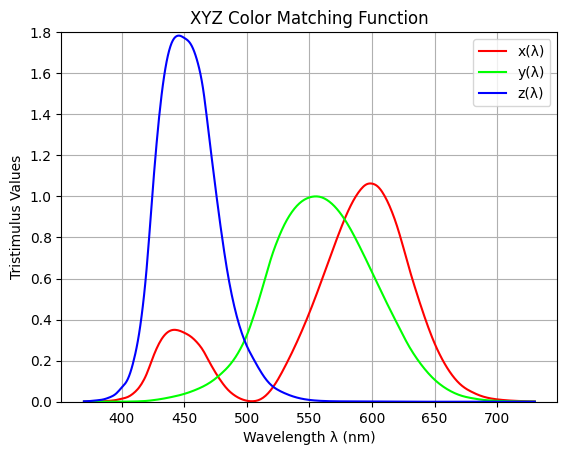

In [107]:
import matplotlib.pyplot as plt

wavelength = []  # λ in nm
x_curve = []
y_curve = []
z_curve = []

with open("cieXYZ_curves.csv", "r") as f:
            for line_no, line in enumerate(f.readlines()):
                if line_no == 0:
                    continue

                fields = line.strip().split(",")
                if len(fields) != 4:
                    print(f"Skipping malformed line {line_no + 1}: {line.strip()}")
                    continue

                wavelength.append(int(fields[0]))
                x_curve.append(float(fields[1]))
                y_curve.append(float(fields[2]))
                z_curve.append(float(fields[3]))

plt.plot(wavelength, x_curve, color='r', label='x(λ)')
plt.plot(wavelength, y_curve, color='lime', label='y(λ)')
plt.plot(wavelength, z_curve, color='b', label='z(λ)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Tristimulus Values")
plt.title("XYZ Color Matching Function")
plt.ylim(0.0,1.80)
plt.grid(True)
plt.legend()
plt.show()

2) Υπολογισμός της συνάρτησης πυκνότητας φάσματος *Β(λ)* για θερμοκρασίες από 1000Κ εώς 30000Κ.

Spectrum Density graphs for three different temperatures:



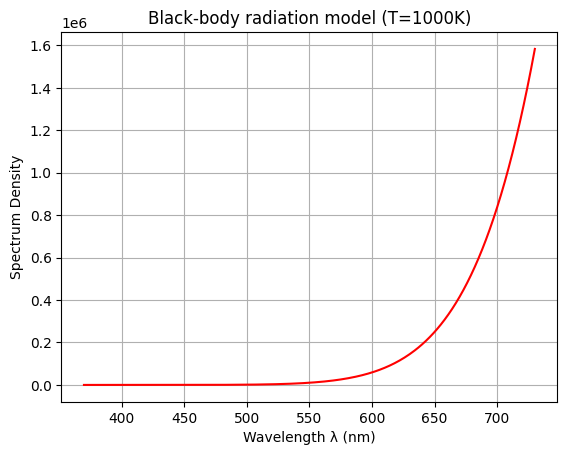

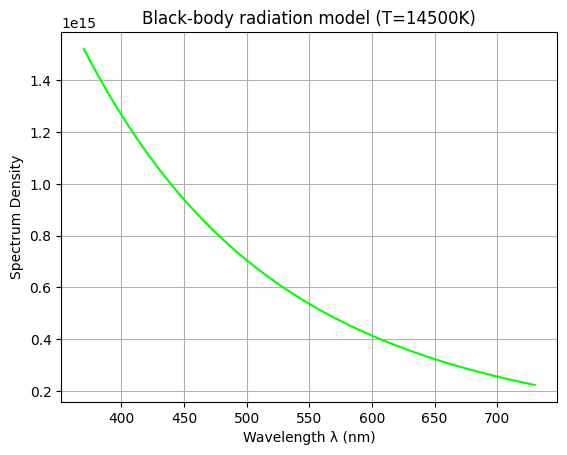

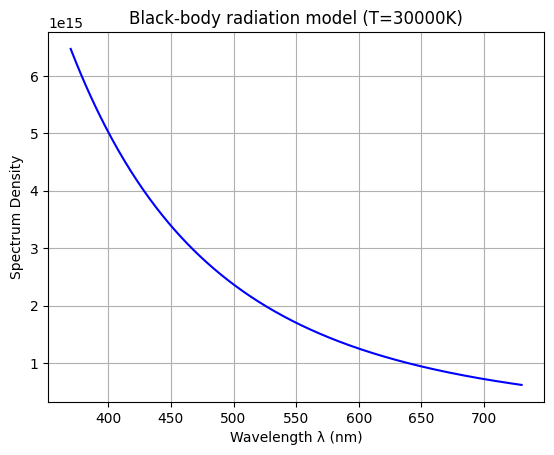

In [108]:
import numpy as np
from math import exp

b_spect = np.zeros((29001,len(wavelength)))
const_1 = 2 * 6.62606957e-34 * 299792458**2 * 1e45
const_2 = 6.62606957e-34 * 299792458 * 1e9 / 1.3806488e-23

for t_index in range(29001):
  t = 1000 + t_index
  for len_index in range(len(wavelength)):
    lamda = wavelength[len_index]
    b_spect[t_index,len_index] = const_1 / (lamda**5 * (exp(const_2/(lamda * t)) - 1))

print('Spectrum Density graphs for three different temperatures:')
print()

plt.plot(wavelength, b_spect[0,:], color='r', label='T=1000K')
plt.title('Black-body radiation model (T=1000K)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Spectrum Density")
plt.grid(True)
plt.show()

plt.plot(wavelength, b_spect[14499,:], color='lime', label='T=14500K')
plt.title('Black-body radiation model (T=14500K)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Spectrum Density")
plt.grid(True)
plt.show()

plt.plot(wavelength, b_spect[29000,:], color='b', label='T=30000K')
plt.title('Black-body radiation model (T=30000K)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Spectrum Density")
plt.grid(True)
plt.show()

3) Υπολογισμός των ολοκληρωμάτων για την εύρεση τιμών απόκρισης X,Y,Z για όλες τις θερμοκρασίες Τ.

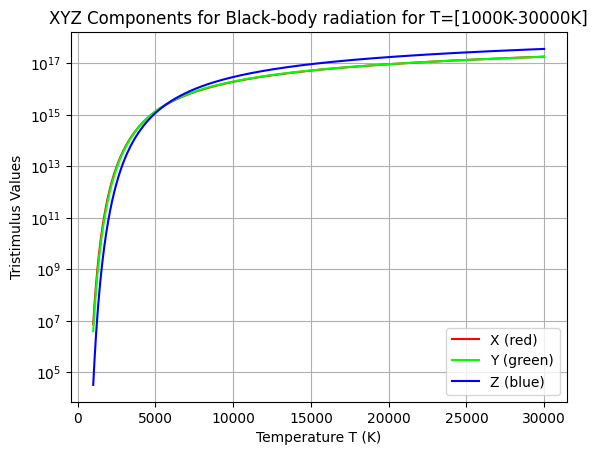

In [109]:
from scipy.integrate import trapezoid

# Για την απλοποίηση των πράξεων μπορούν να πολλαπλασιαστούν στοιχείο προς στοι-
# χείο οι πίνακες των Β(λ) και συνάρτησης χρωματικής αντιστοίχισης, αφού κατά
# τον υπολογισμό του ολοκληρώματος πολλαπλασιάζονται οι τιμές τους για το ίδιο λ.
x_times_b = np.multiply(x_curve, b_spect)
y_times_b = np.multiply(y_curve, b_spect)
z_times_b = np.multiply(z_curve, b_spect)

a_XYZ = np.zeros((29001,3))

# Λόγω του διακριτού πεδίου μήκους κύματος (άρα και του δακριτού συνόλου τιμών
# των αντίστοιχων συναρτήσεων), η τιμή των ολοκληρωμάτων δεν μπορεί να υπολογι-
# στεί ακριβώς αλλά προσεγγίζεται με τον κανόνα του τραπεζίου.
a_XYZ[:, 0] = trapezoid(x_times_b, wavelength, axis=1)
a_XYZ[:, 1] = trapezoid(y_times_b, wavelength, axis=1)
a_XYZ[:, 2] = trapezoid(z_times_b, wavelength, axis=1)

plt.plot(range(1000, 30001), a_XYZ[:, 0], color='r', label='X (red)')
plt.plot(range(1000, 30001), a_XYZ[:, 1], color='lime', label='Y (green)')
plt.plot(range(1000, 30001), a_XYZ[:, 2], color='b', label='Z (blue)')
plt.xlabel("Temperature T (K)")
plt.ylabel("Tristimulus Values")
plt.yscale("log")
plt.title("XYZ Components for Black-body radiation for T=[1000K-30000K]")
plt.grid(True)
plt.legend()
plt.show()

## **Ερώτηση 2**

The trace (white) of the colours on the xy plane according to the temperature:


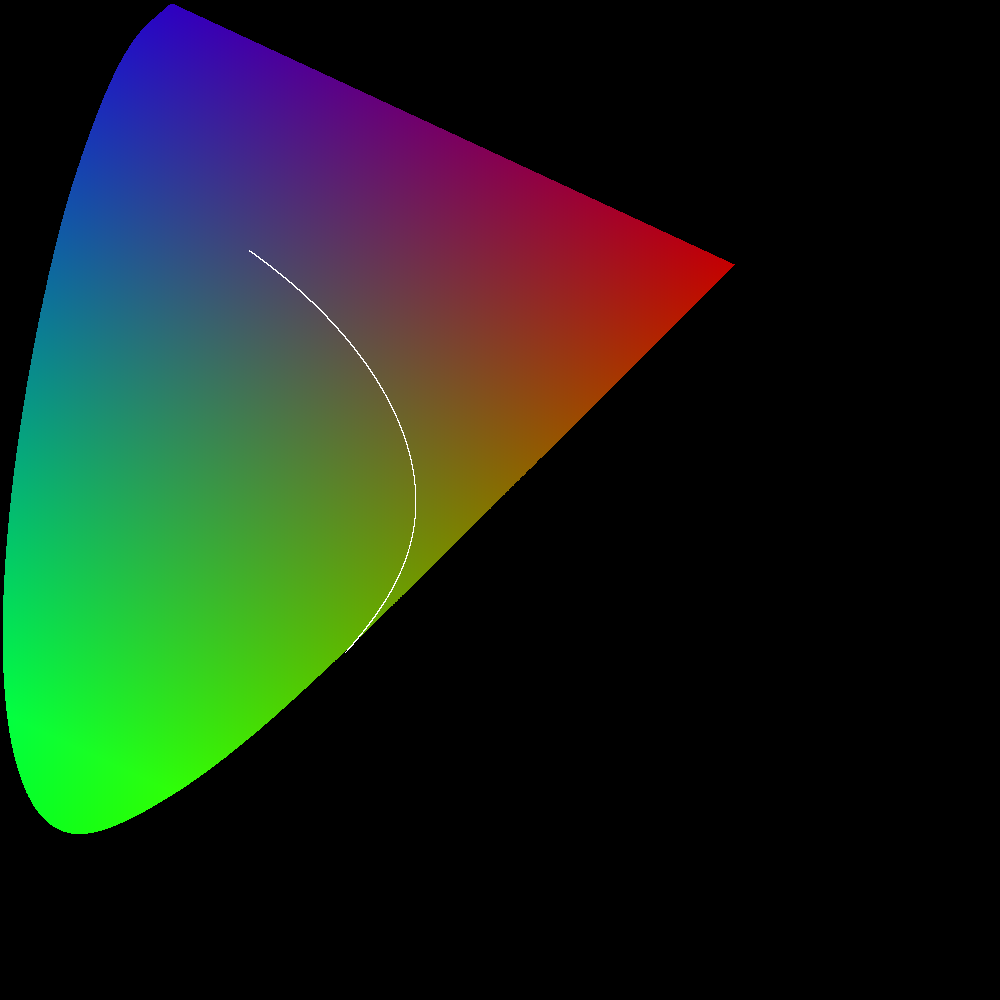

In [112]:
import cv2
from google.colab.patches import cv2_imshow

chroma_diag = cv2.imread("chromaDiagram.png")

xy_plane = np.zeros((29001,2))

xy_plane[:,0] = np.divide(a_XYZ[:, 0], (a_XYZ[:, 0] + a_XYZ[:, 1] + a_XYZ[:, 2]))
xy_plane[:,1] = np.divide(a_XYZ[:, 1], (a_XYZ[:, 0] + a_XYZ[:, 1] + a_XYZ[:, 2]))

c = np.round(1000 * xy_plane[:,0]).astype(int)
r = np.round(1000 * xy_plane[:,1]).astype(int)

for i in range(len(c)):
  chroma_diag[c[i],r[i],:] = 255

print("The trace (white) of the colours on the xy plane according to the temperature:")
cv2_imshow(chroma_diag)

## **Ερώτηση 3**

The shape of the raw (greyscaled) image is:  (1990, 823)


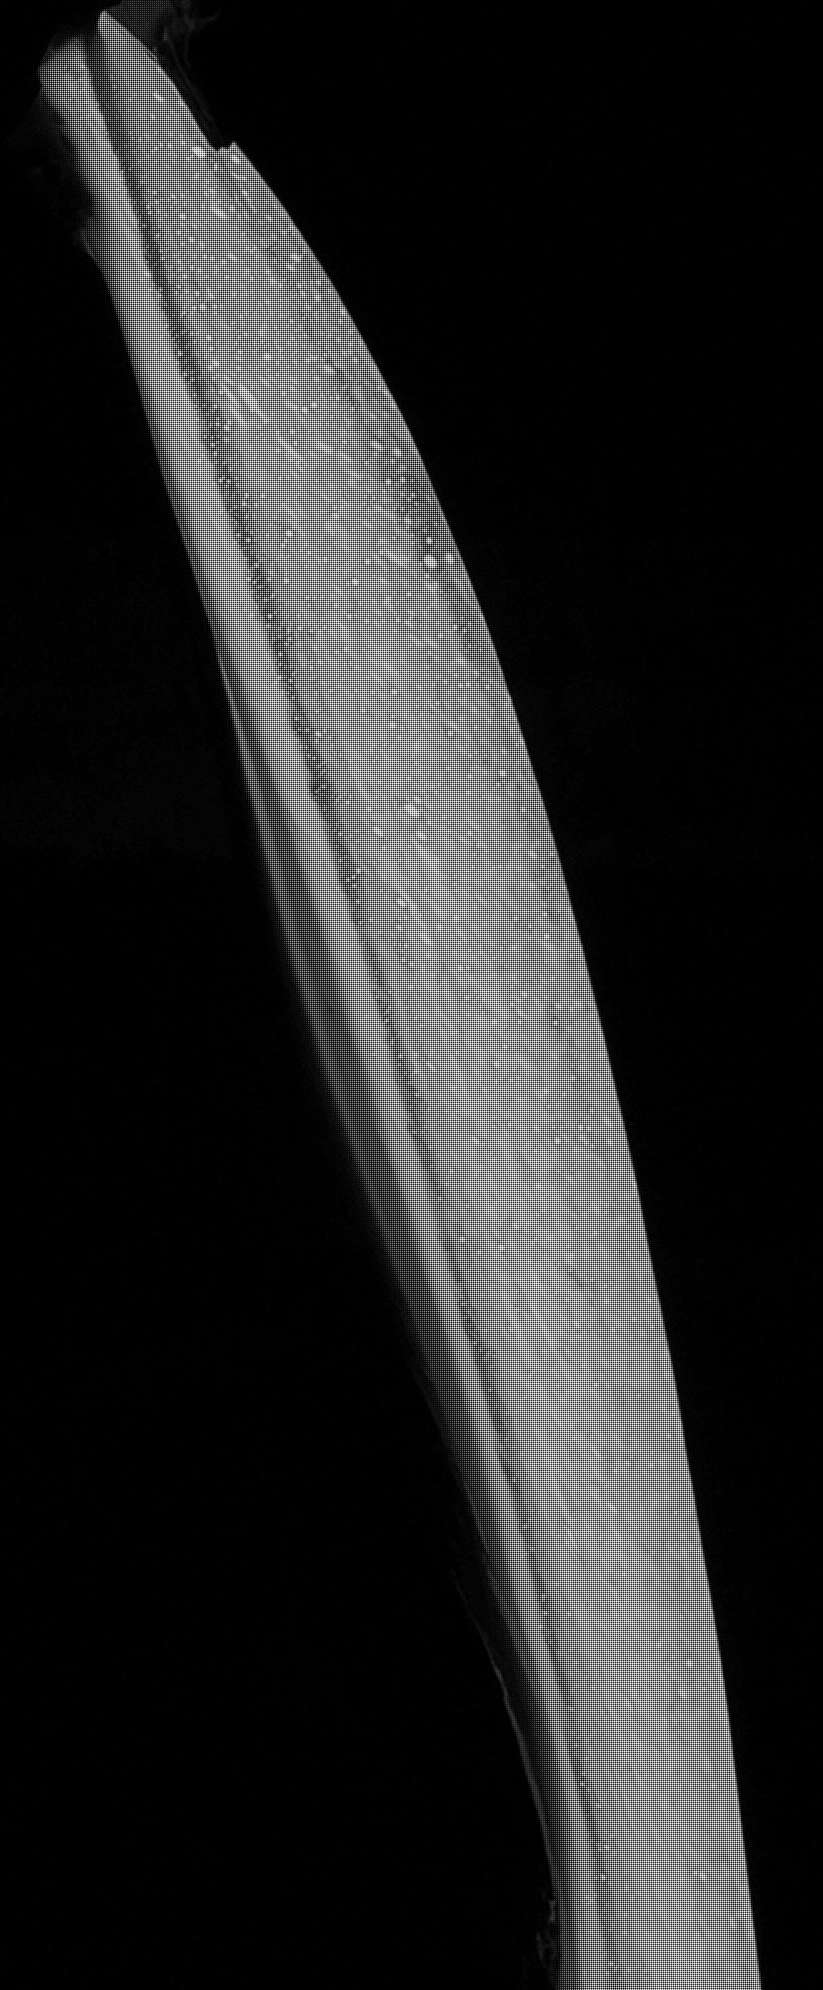

The shape of the demosaiced image is:  (1990, 823, 3)


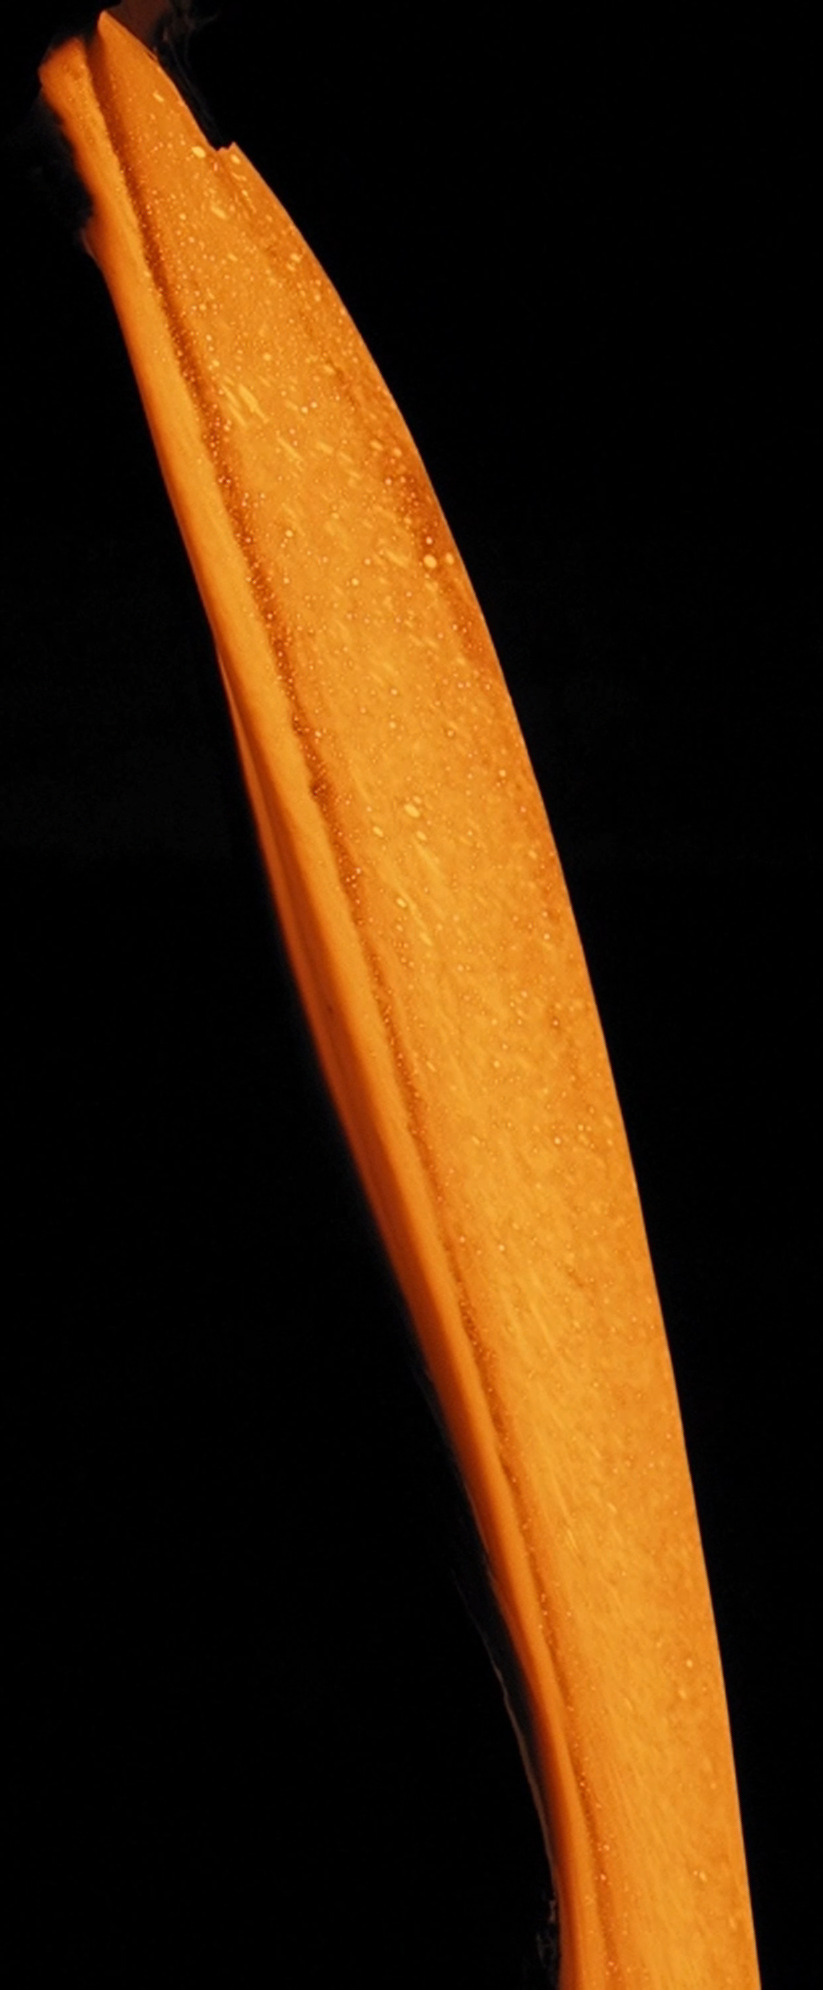

In [ ]:
raw_image = cv2.imread('CFA_stream.png', cv2.IMREAD_GRAYSCALE)

print("The shape of the raw (greyscaled) image is: ",raw_image.shape)
cv2_imshow(raw_image)

demosaiced_image = cv2.cvtColor(raw_image, cv2.COLOR_BayerGR2BGR)

print("The shape of the demosaiced image is: ", demosaiced_image.shape)
cv2_imshow(demosaiced_image)